In [451]:
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import ufloat

from spe_funcs import load_data

### Choose a file out of the files list to determine the fwhm on

In [452]:
file = "data/Energiespektrum-Na22-NaI-328s.Spe"

In [453]:
data, roi = load_data(file, only_roi=False)
roi = np.arange(4500, 5600)
data = data[roi]

In [454]:
data_stds = 0.01 * data

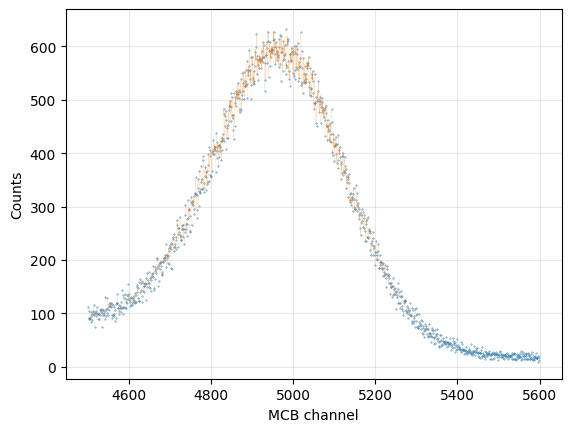

In [455]:
plt.scatter(roi, data, s=0.1)
plt.fill_between(roi, data - data_stds, data + data_stds)
plt.grid(alpha=.3)
plt.xlabel('MCB channel')
plt.ylabel('Counts')
plt.show()

In [456]:
from lmfit.models import GaussianModel, LinearModel

peak = GaussianModel()
background = LinearModel()
model = peak + background

In [457]:
init_values = {
    'amplitude': {'value': 500, 'min': 0},
    'center': {'value': 4537, 'min': 4250, 'max': 5100},
    'sigma': {'value': 145, 'min': 130, 'max': 160},
    'slope': {'value': -0.1927, 'min': -10, 'max': 0},
    'intercept': {'value': 1108, 'min': 0, 'max': 2000},
}
params = model.make_params(**init_values)
params.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude       500        0      inf     None     True     None     None
center         4537     4250     5100     None     True     None     None
fwhm          341.4     -inf      inf     None    False 2.3548200*sigma     None
height        1.376     -inf      inf     None    False 0.3989423*amplitude/max(1e-15, sigma)     None
intercept      1108        0     2000     None     True     None     None
sigma           145      130      160     None     True     None     None
slope       -0.1927      -10        0     None     True     None     None


In [458]:
result = model.fit(data, params, x=list(roi), weights=1.)
result.params.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  2.121e+05        0      inf     1074     True     None     None
center         4963     4250     5100   0.4813     True     None     None
fwhm          373.3     -inf      inf    1.502    False 2.3548200*sigma     None
height        533.7     -inf      inf    1.451    False 0.3989423*amplitude/max(1e-15, sigma)     None
intercept     427.5        0     2000    10.75     True     None     None
sigma         158.5      130      160   0.6379     True     None     None
slope      -0.07433      -10        0 0.002026     True     None     None


In [459]:
fitted_params = result.params
x = np.linspace(min(roi), max(roi), 1000)
y = model.eval(x=x, params=fitted_params)

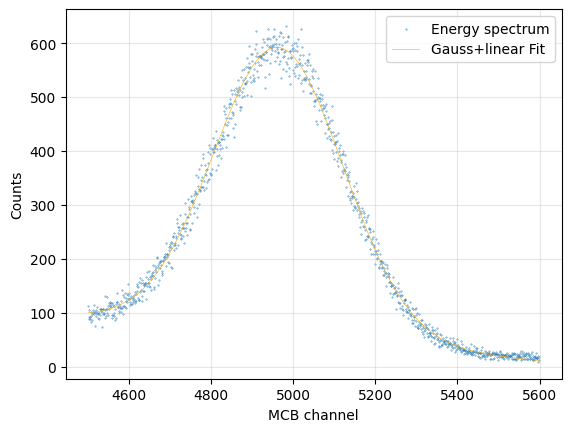

In [460]:
plt.scatter(roi, data, s=0.1, label='Energy spectrum')
plt.plot(x, y, linewidth=.4, c='orange', label='Gauss+linear Fit')
plt.grid(alpha=.3)
plt.legend()
plt.xlabel('MCB channel')
plt.ylabel('Counts')
plt.show()

In [461]:
centerone = ufloat(fitted_params['center'].value, fitted_params['center'].stderr)
print(centerone)

4963.2+/-0.5


In [462]:
data, roi = load_data(file, only_roi=False)
roi = np.arange(1700, 2400)
data = data[roi]

In [463]:
data_stds = 0.01 * data

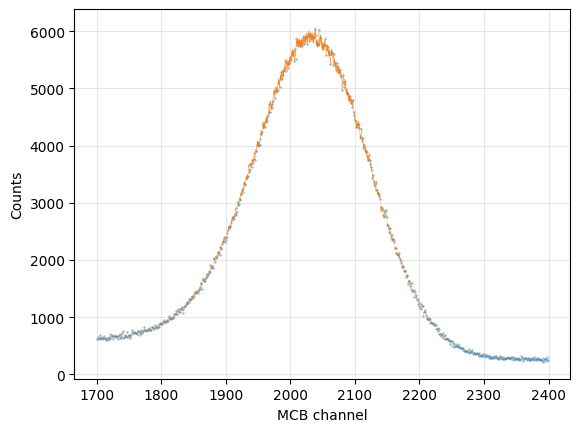

In [464]:
plt.scatter(roi, data, s=0.1)
plt.fill_between(roi, data - data_stds, data + data_stds)
plt.grid(alpha=.3)
plt.xlabel('MCB channel')
plt.ylabel('Counts')
plt.show()

In [465]:
from lmfit.models import GaussianModel, LinearModel

peak = GaussianModel()
background = LinearModel()
model = peak + background

In [466]:
init_values = {
    'amplitude': {'value': max(data) - min(data), 'min': 0},
    'center': {'value': roi[np.where(data == max(data))[0][0]], 'min': roi[0], 'max': roi[-1]},
    'sigma': {'value': 100, 'min': 0, 'max': 1000},
    'slope': {'value': -1, 'min': -10, 'max': 0},
    'intercept': {'value': 500, 'min': 0, 'max': 5000},
}
params = model.make_params(**init_values)
params.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude      5811        0      inf     None     True     None     None
center         2038     1700     2399     None     True     None     None
fwhm          235.5     -inf      inf     None    False 2.3548200*sigma     None
height        23.18     -inf      inf     None    False 0.3989423*amplitude/max(1e-15, sigma)     None
intercept       500        0     5000     None     True     None     None
sigma           100        0     1000     None     True     None     None
slope            -1      -10        0     None     True     None     None


In [467]:
result = model.fit(data, params, x=list(roi), weights=1. / data_stds)
result.params.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.218e+06        0      inf     4349     True     None     None
center         2028     1700     2399   0.2647     True     None     None
fwhm          210.6     -inf      inf   0.5198    False 2.3548200*sigma     None
height         5434     -inf      inf    24.52    False 0.3989423*amplitude/max(1e-15, sigma)     None
intercept      1758        0     5000    16.78     True     None     None
sigma         89.42        0     1000   0.2207     True     None     None
slope       -0.6361      -10        0 0.007268     True     None     None


In [468]:
fitted_params = result.params
x = np.linspace(min(roi), max(roi), 1000)
y = model.eval(x=x, params=fitted_params)

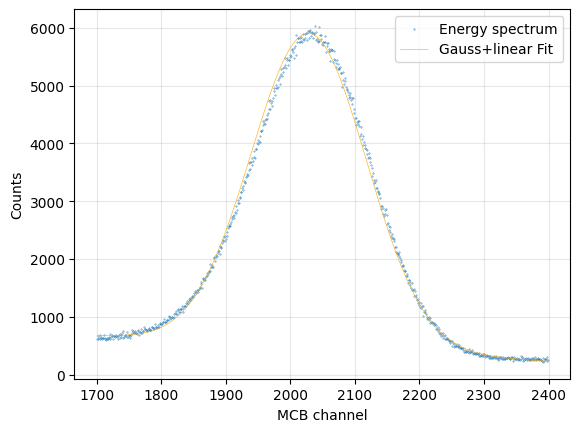

In [469]:
plt.scatter(roi, data, s=0.1, label='Energy spectrum')
plt.plot(x, y, linewidth=.4, c='orange', label='Gauss+linear Fit')
plt.grid(alpha=.3)
plt.legend()
plt.xlabel('MCB channel')
plt.ylabel('Counts')
plt.show()

In [470]:
centertwo = ufloat(fitted_params['center'].value, fitted_params['center'].stderr)
print(centerone)

4963.2+/-0.5


In [471]:
resolution = abs((1274.542 - 511) / (centerone - centertwo))
print(f'Resolution: {resolution} keV/channel')
diff = centertwo * resolution - 511
print(centerone * resolution - 1274.542)
print(diff)
print(f'Both diff equal?: {diff == centerone * resolution - 1274.542}')

Resolution: 0.26016+/-0.00005 keV/channel
16.67+/-0.15
16.67+/-0.15
Both diff equal?: True


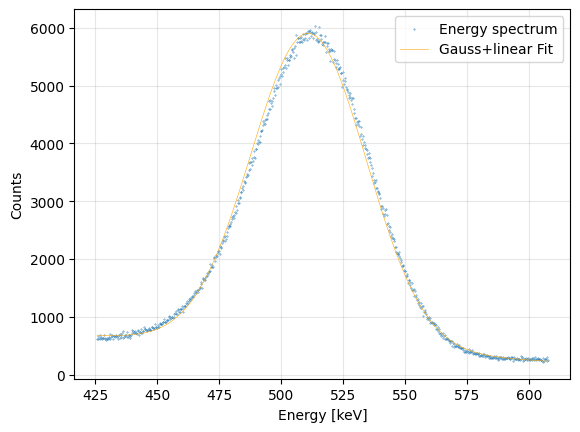

In [472]:
plt.scatter(roi * resolution.n - diff.n, data, s=0.1, label='Energy spectrum')
plt.plot(x * resolution.n - diff.n, y, linewidth=.4, c='orange', label='Gauss+linear Fit')
plt.grid(alpha=.3)
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')
plt.show()

In [473]:
print(f'Energy resolution of NAI detector: {resolution} * x + {diff} keV/channel')

Energy resolution of NAI detector: 0.26016+/-0.00005 * x + 16.67+/-0.15 keV/channel


In [474]:
print(f"check peaks: {centerone * resolution.n - diff.n} & {centertwo * resolution.n - diff.n}")

check peaks: 1274.54+/-0.13 & 511.00+/-0.07
